In [1]:
import tensorflow as tf

print("TensorFlow Version:",tf.__version__)

TensorFlow Version: 2.3.0


In [3]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
#df1 = pd.read_csv('20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv/new_2000_utte.csv')
#df1.head()

In [5]:
df = pd.read_csv('Bitext_Sample_Customer_Service_Training_Dataset.csv')
df.head()

,flags,utterance,category,intent
0,BM,I have problems with canceling an order,ORDER,cancel_order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order
2,B,I need help with canceling the last order,ORDER,cancel_order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order
4,B,problem with cancelling an order I made,ORDER,cancel_order


In [6]:
# Missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.style.background_gradient(cmap='seismic')

,Total,Percent
flags,0,0.000000
utterance,0,0.000000
category,0,0.000000
intent,0,0.000000


In [7]:
gc = df.intent.value_counts().to_frame()

print(gc)

                          intent
review                       499
get_invoice                  324
check_invoice                324
payment_issue                323
track_refund                 308
set_up_shipping_address      307
place_order                  306
track_order                  305
cancel_order                 305
change_order                 304
delivery_options             302
check_refund_policy          302
delivery_period              301
contact_customer_service     299
create_account               298
check_cancellation_fee       298
recover_password             298
complaint                    298
delete_account               298
check_payment_methods        297
change_shipping_address      297
contact_human_agent          297
registration_problems        296
newsletter_subscription      295
get_refund                   294
edit_account                 294
switch_account               290


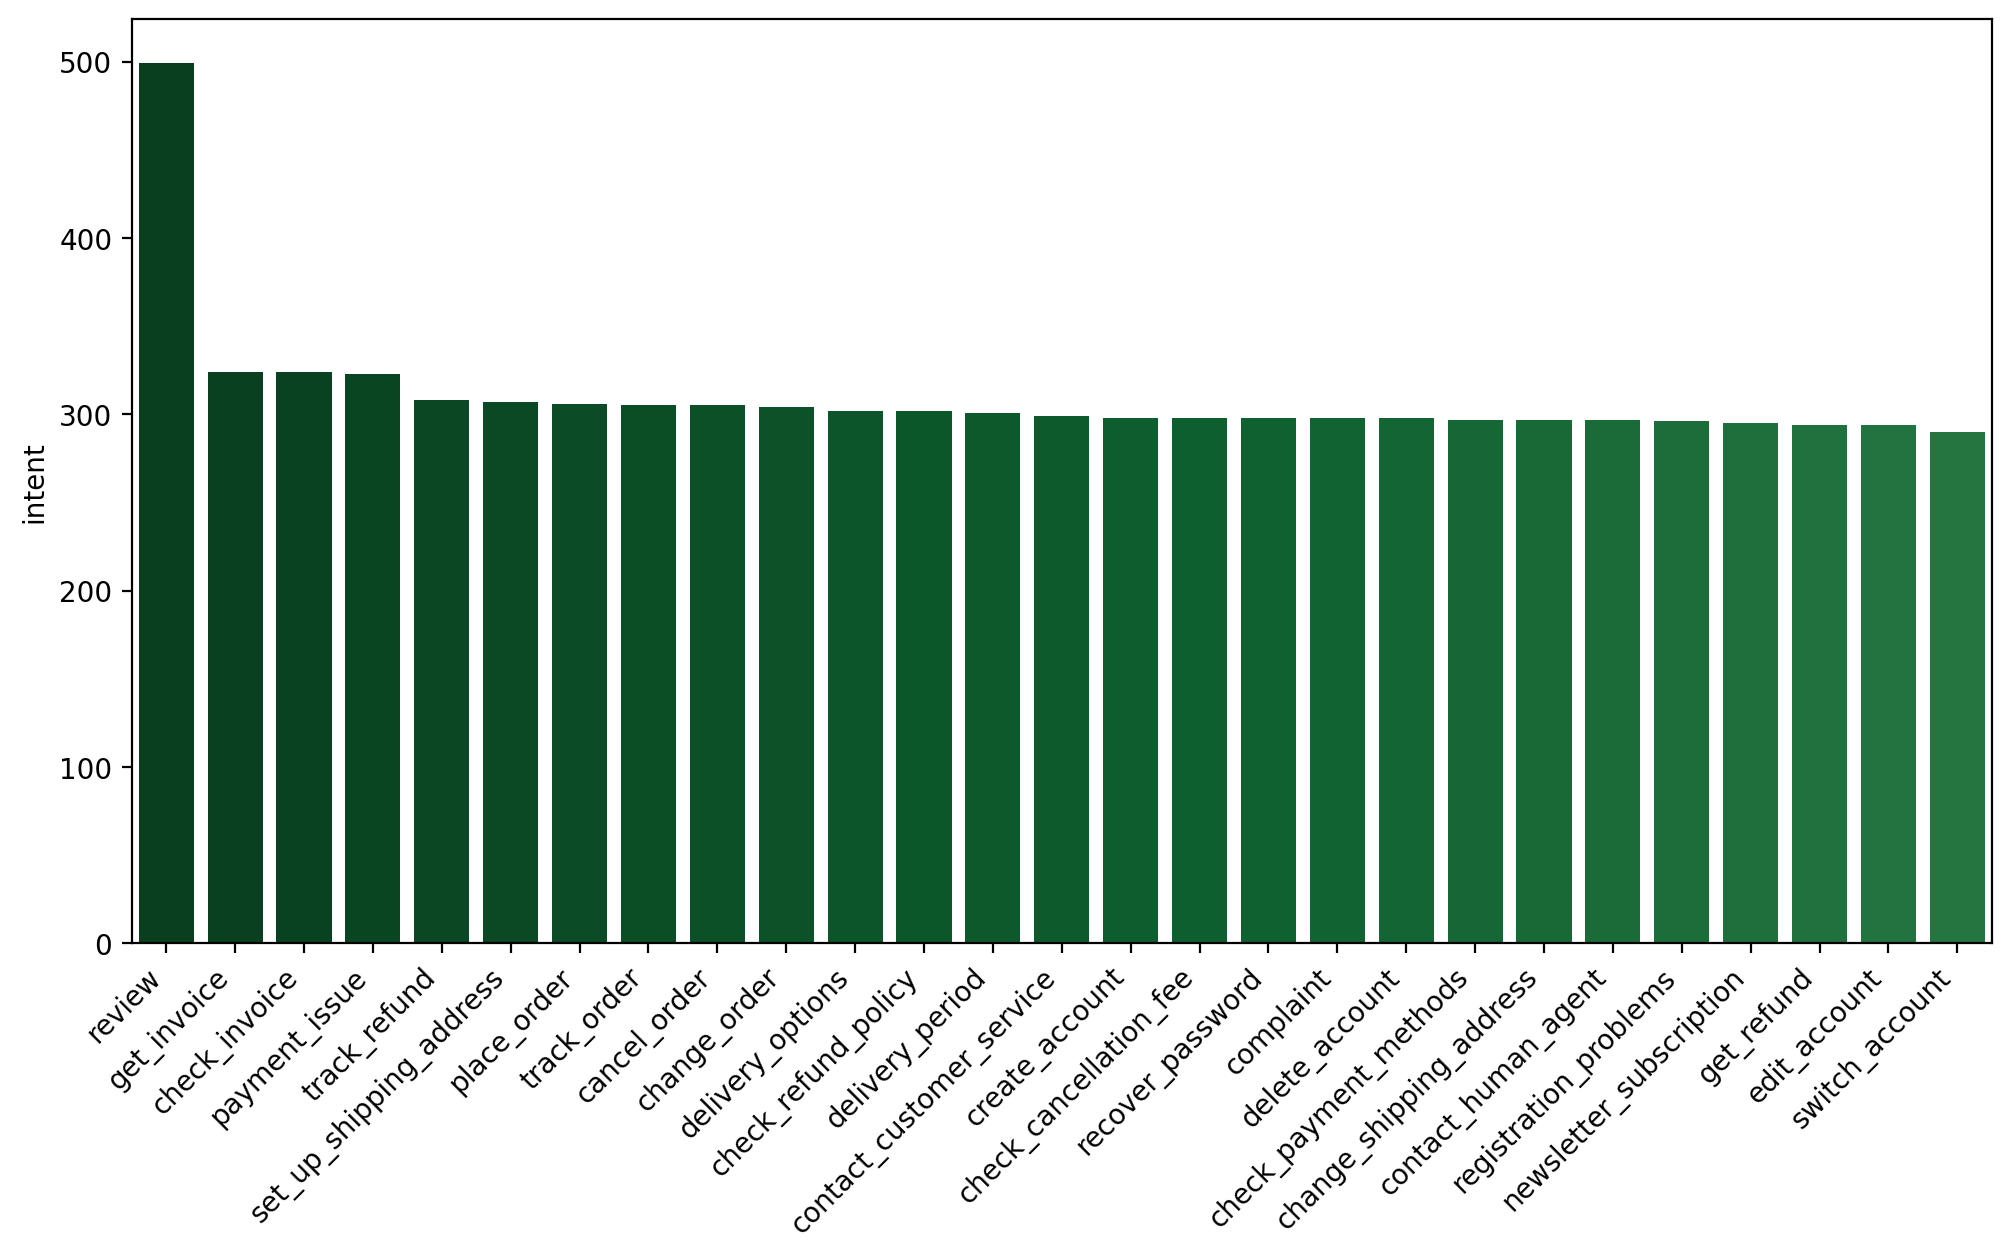

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=gc.index, y=gc.intent, palette=sns.color_palette("BuGn_r", n_colors=len(gc)+100 ), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

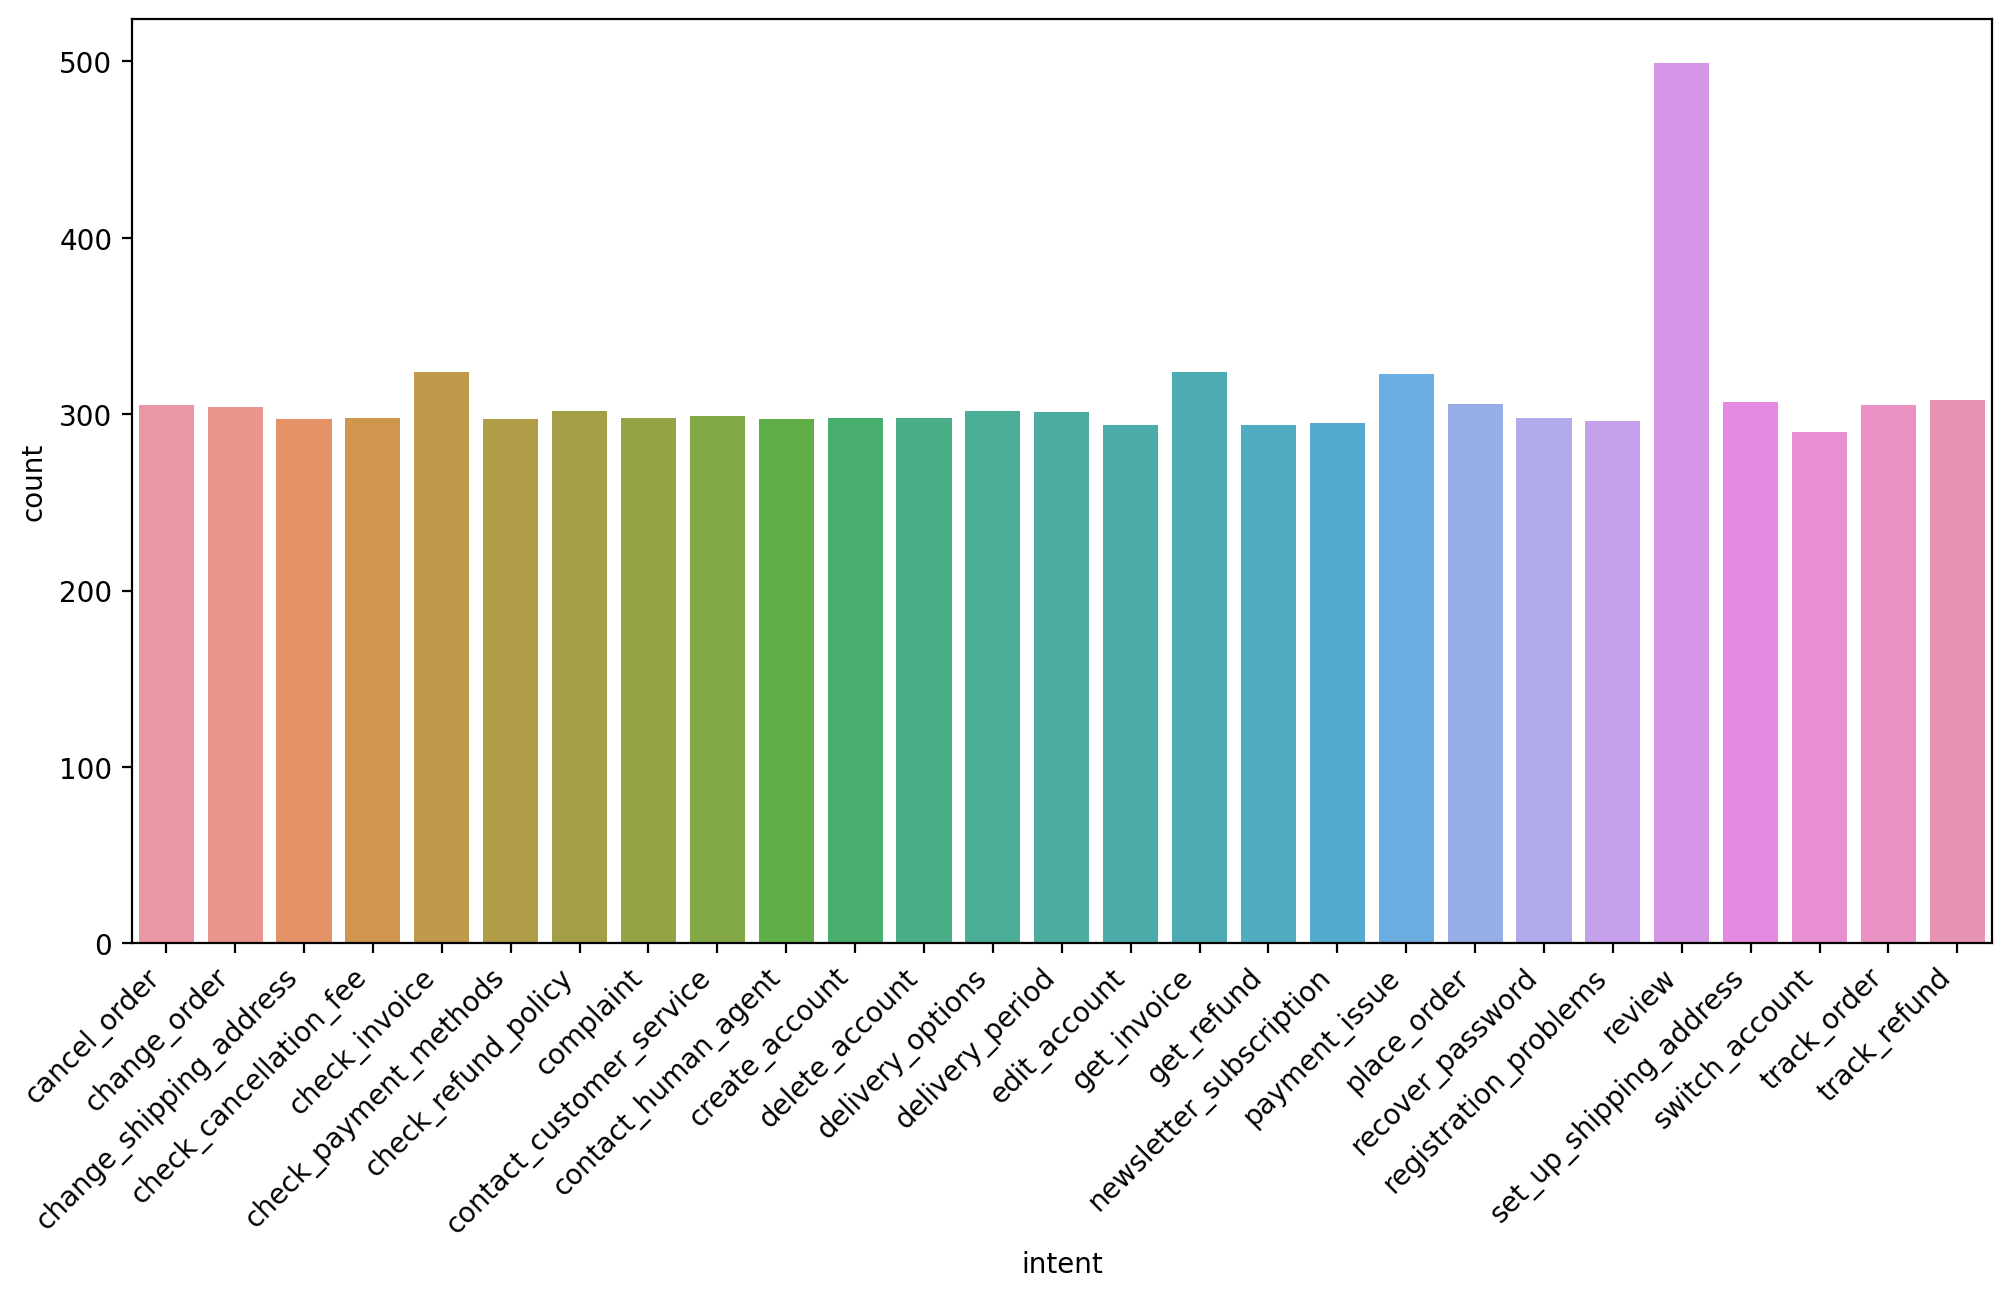

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='intent', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df1,
              x='intent',
              order=df['intent'].value_counts().index)
plt.xticks(rotation=45, ha='right');

NameError: name 'df1' is not defined

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [12]:
new_da = { 'text': df['utterance'], 'intent': df['intent']}
df = pd.DataFrame(new_da)
df

,text,intent
0,I have problems with canceling an order,cancel_order
1,how can I find information about canceling ord...,cancel_order
2,I need help with canceling the last order,cancel_order
3,could you help me cancelling the last order I ...,cancel_order
4,problem with cancelling an order I made,cancel_order
...,...,...
8354,I need help to check if there is any updates o...,track_refund
8355,refund status,track_refund
8356,how can I check the status of the refund?,track_refund
8357,help checking if there is anything wrong with ...,track_refund


(-0.5, 999.5, 799.5, -0.5)

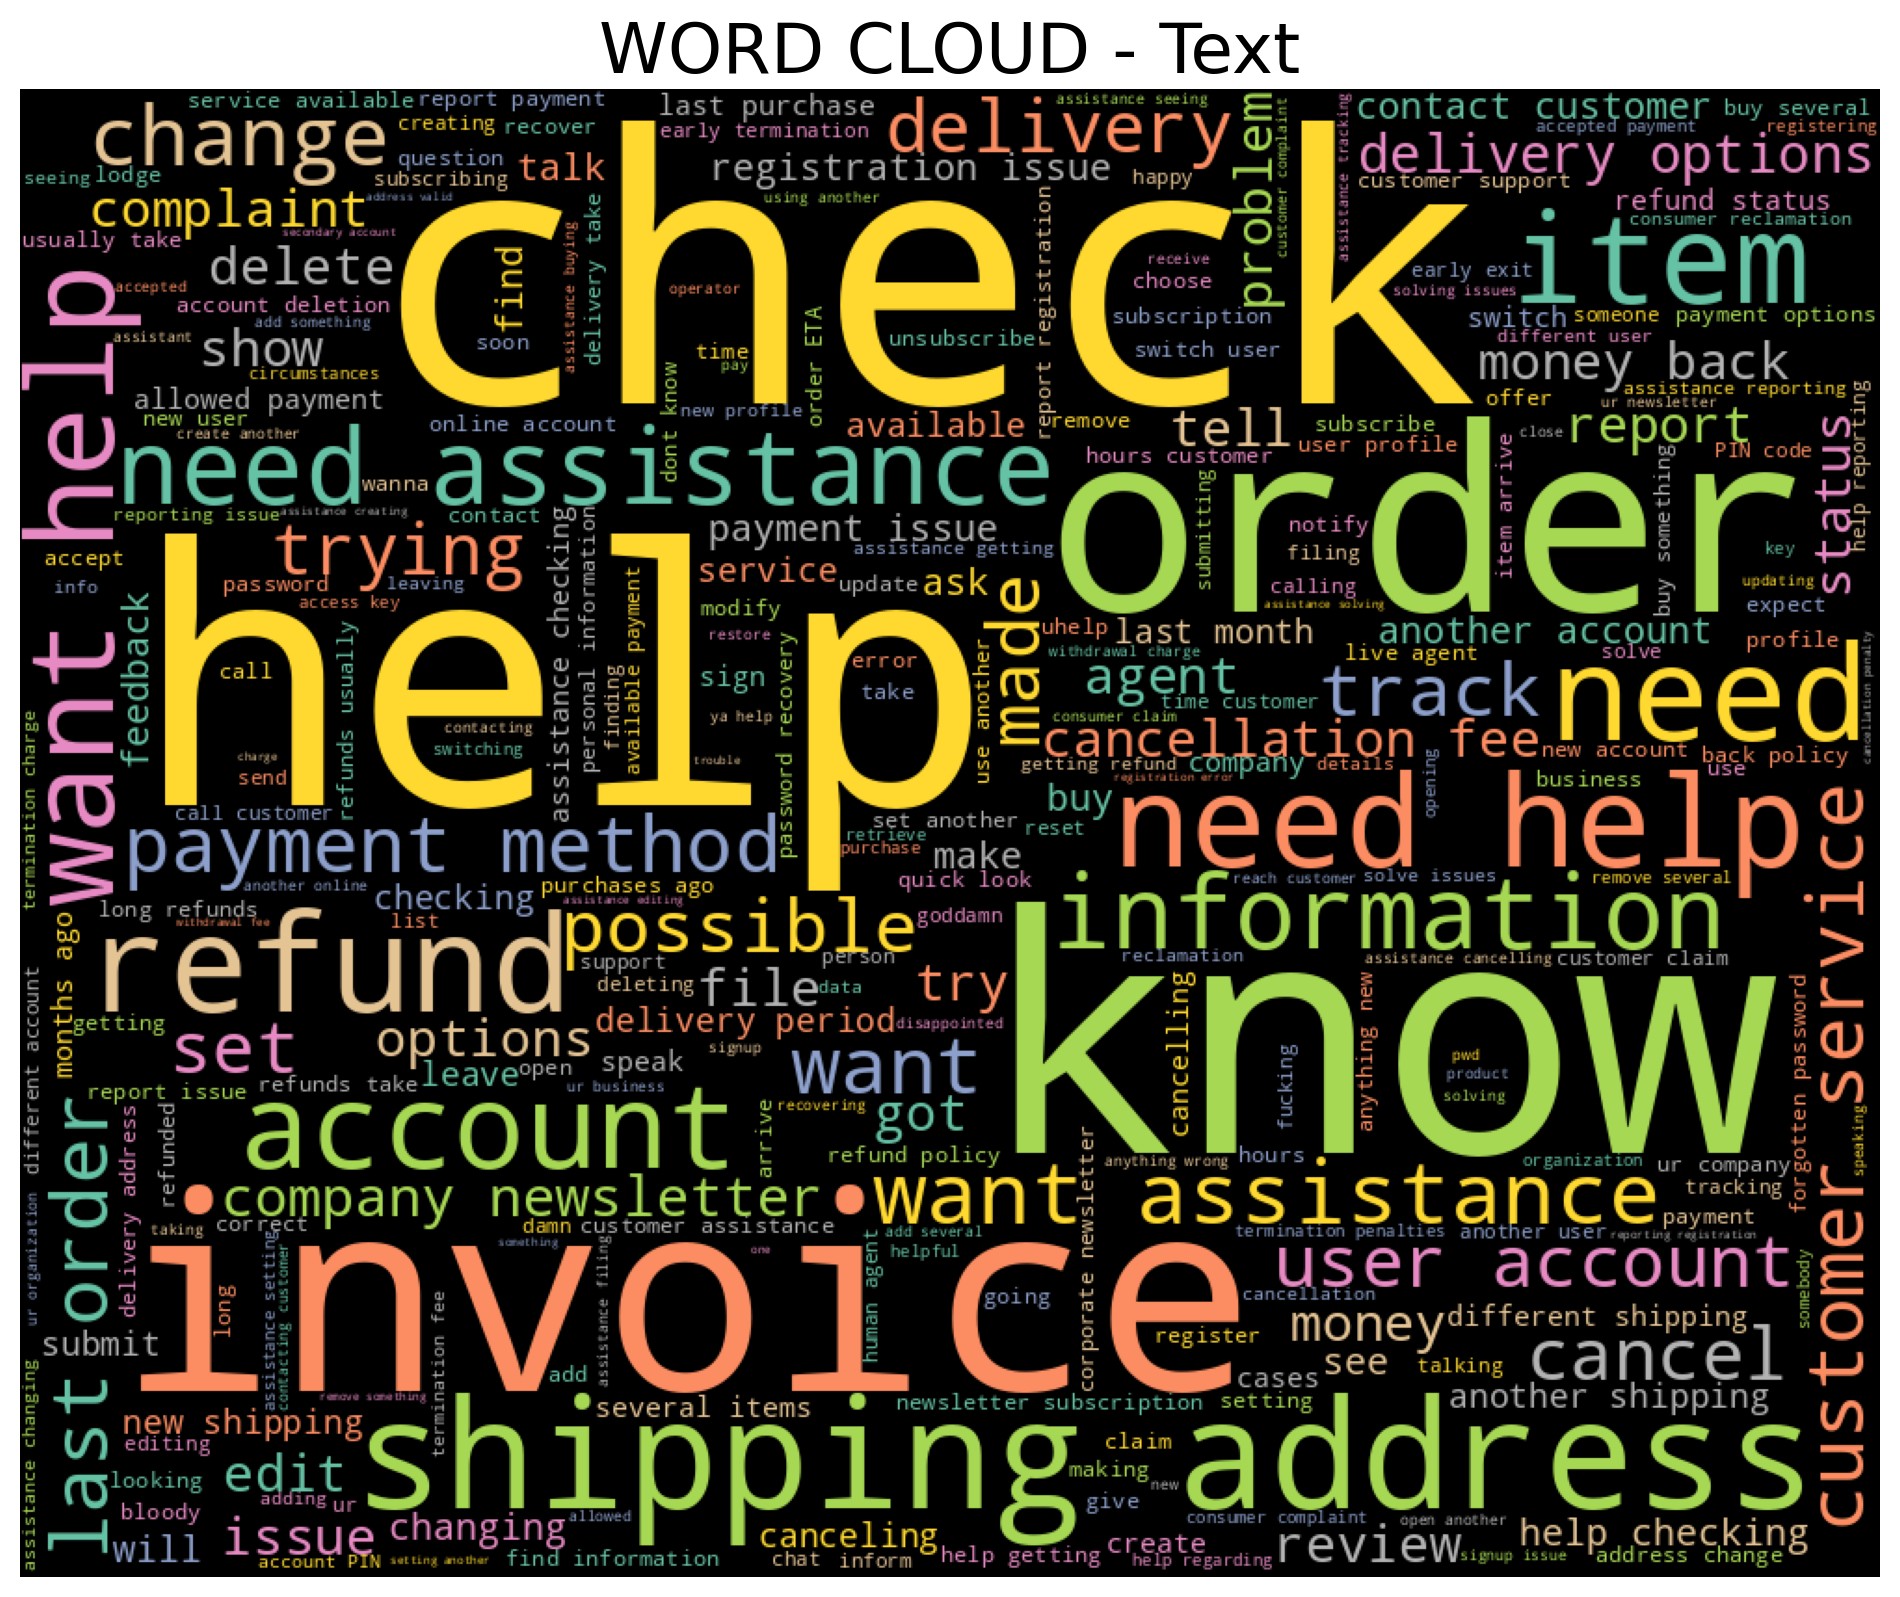

In [13]:
import re
import matplotlib.image as image
import matplotlib.colors
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify as sq

stopwords = set(STOPWORDS)
newStopWords = ['?', "!", "why", 'what', 'how']
stopwords.update(newStopWords)
wordcloud = WordCloud(
    stopwords=stopwords,
    colormap='Set2',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['text'].astype(str)))
print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Text",fontsize=25)
plt.axis('off')

In [ ]:
# data prepararion
x2011 = df.text
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=855,
                          height=855
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv/'

In [ ]:
comments_text = str(df.text)
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=2000, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')
words = set(stopwords.words("english"))

count = 0
for elem in iter(words):
    count = count + 1
    if count == 20:
        break
    print (elem)

train_df['text'] = train_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))
test_df['text'] = test_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))

train_df['text'] = train_df['text'].str.replace('\d+', '')
test_df['text'] = test_df['text'].str.replace('\d+', '')

In [14]:
from sklearn.model_selection import train_test_split    
train_df, test_df = train_test_split(df, shuffle = True, test_size = 0.2)

In [15]:
train_df

,text,intent
798,I cannot corrdct my shipping address,change_shipping_address
88,can you help me to cancel my order?,cancel_order
734,I would like to change my shipping address,change_shipping_address
196,I have a problem with canceling the last order...,cancel_order
4633,how can I get the invoice from August?,get_invoice
...,...,...
5734,I don't know what to do to report payment issues,payment_issue
5191,i need assistance subscribing to the goddamn n...,newsletter_subscription
5390,information about subscribing to your company ...,newsletter_subscription
860,I would like to know about changing my shippin...,change_shipping_address


In [16]:
test_df

,text,intent
6582,where can i report a sign-up issue,registration_problems
2663,help me check what hours customer service avai...,contact_customer_service
6201,help to reset the pwd of my account,recover_password
5009,I need help to get refunds,get_refund
7038,i am not satisfied,review
...,...,...
208,I do not know how I can cancel the order I hav...,cancel_order
7662,"I do not need this user,how to change to my ne...",switch_account
747,give me information about a shipping address c...,change_shipping_address
1720,I want help to check your allowed payment methods,check_payment_methods


In [17]:
train_df.shape

(6687, 2)

In [18]:
temp_df=df.intent.value_counts()
temp_df

review                      499
get_invoice                 324
check_invoice               324
payment_issue               323
track_refund                308
set_up_shipping_address     307
place_order                 306
track_order                 305
cancel_order                305
change_order                304
delivery_options            302
check_refund_policy         302
delivery_period             301
contact_customer_service    299
create_account              298
check_cancellation_fee      298
recover_password            298
complaint                   298
delete_account              298
check_payment_methods       297
change_shipping_address     297
contact_human_agent         297
registration_problems       296
newsletter_subscription     295
get_refund                  294
edit_account                294
switch_account              290
Name: intent, dtype: int64

In [19]:
temp_train=train_df.intent.value_counts()
temp_train

review                      404
payment_issue               272
check_invoice               258
get_invoice                 255
track_order                 254
delivery_period             251
check_refund_policy         248
delivery_options            247
contact_customer_service    246
create_account              245
set_up_shipping_address     244
cancel_order                242
registration_problems       242
change_shipping_address     240
newsletter_subscription     239
delete_account              238
change_order                237
place_order                 237
complaint                   236
recover_password            235
check_cancellation_fee      235
switch_account              234
get_refund                  232
check_payment_methods       231
contact_human_agent         230
edit_account                229
track_refund                226
Name: intent, dtype: int64

In [20]:
temp_test=test_df.intent.value_counts()
temp_test

review                      95
track_refund                82
place_order                 69
get_invoice                 69
change_order                67
contact_human_agent         67
check_invoice               66
check_payment_methods       66
edit_account                65
check_cancellation_fee      63
set_up_shipping_address     63
recover_password            63
cancel_order                63
complaint                   62
get_refund                  62
delete_account              60
change_shipping_address     57
switch_account              56
newsletter_subscription     56
delivery_options            55
registration_problems       54
check_refund_policy         54
create_account              53
contact_customer_service    53
track_order                 51
payment_issue               51
delivery_period             50
Name: intent, dtype: int64

In [21]:
bert_model_name = "C:/Users/PC/Desktop/PFE/uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [22]:
os.makedirs("model", exist_ok=True)

In [23]:
class IntentDetectionData:
  DATA_COLUMN = "text"
  LABEL_COLUMN = "intent"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)
     

In [24]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))
tokens = tokenizer.tokenize("I want to get my money back")
print(tokens)


['i', 'want', 'to', 'get', 'my', 'money', 'back']


In [25]:
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2215, 2000, 2131, 2026, 2769, 2067]

In [26]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model



In [27]:
classes = df.intent.unique().tolist()
data = IntentDetectionData(train_df, test_df, tokenizer, classes, max_seq_len=128)

6687it [00:01, 3967.39it/s]
1672it [00:00, 3935.39it/s]

max seq_len 37


In [28]:
data.train_x.shape

(6687, 37)

In [29]:
classes

['cancel_order',
 'change_order',
 'change_shipping_address',
 'check_cancellation_fee',
 'check_invoice',
 'check_payment_methods',
 'check_refund_policy',
 'complaint',
 'contact_customer_service',
 'contact_human_agent',
 'create_account',
 'delete_account',
 'delivery_options',
 'delivery_period',
 'edit_account',
 'get_invoice',
 'get_refund',
 'newsletter_subscription',
 'payment_issue',
 'place_order',
 'recover_password',
 'registration_problems',
 'review',
 'set_up_shipping_address',
 'switch_account',
 'track_order',
 'track_refund']

In [30]:
data.train_x.shape
     

(6687, 37)

In [31]:
data.train_x[0]

array([  101,  1045,  3685,  2522, 12171, 16409,  2102,  2026,  7829,
        4769,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [32]:
data.train_y[0]

2

In [33]:
data.test_x[0]

array([ 101, 2073, 2064, 1045, 3189, 1037, 3696, 1011, 2039, 3277,  102,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [34]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 37, 768)
Done loading 196 BERT weights from: C:/Users/PC/Desktop/PFE/uncased_L-12_H-768_A-12\bert_model.ckpt into <bert.model.BertModelLayer object at 0x0000015569857848> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [35]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 37)]              0         
_________________________________________________________________
bert (BertModelLayer)        (None, 37, 768)           108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)               

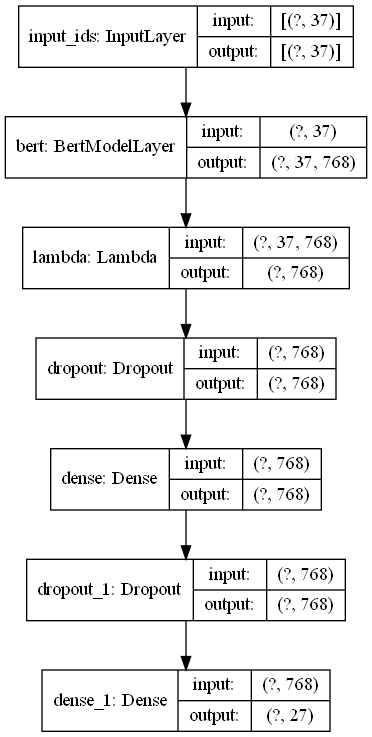

In [36]:
import graphviz
import pydot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:

#Training BERT

#BERT's recommendation for training

#Batch size: 16, 32

#Learning rate (Adam): 5e-5, 3e-5, 2e-5

#Number of epochs: 2, 3, 4

In [38]:

from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [39]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [40]:
# for tensorboard

tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
     

In [41]:
data.train_y

array([ 2,  0,  2, ..., 17,  2, 23])

In [42]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.2,
  batch_size=16,
  shuffle=True,
  epochs=5,
  callbacks=[tensorboard_callback]
)

Epoch 1/5
  1/335 [..............................] - ETA: 0s - loss: 3.2745 - acc: 0.0625WARNING:tensorflow:From C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
335/335 [==============================] - 796s 2s/step - loss: 3.0930 - acc: 0.3131 - val_loss: 2.6340 - val_acc: 0.7691
Epoch 2/5
335/335 [==============================] - 822s 2s/step - loss: 2.5571 - acc: 0.8441 - val_loss: 2.4622 - val_acc: 0.8976
Epoch 3/5
335/335 [==============================] - 818s 2s/step - loss: 2.4321 - acc: 0.9430 - val_loss: 2.3979 - val_acc: 0.9619
Epoch 4/5
335/335 [==============================] - 826s 2s/step - loss: 2.3819 - acc: 0.9845 - val_loss: 2.3684 - val_acc: 0.9895
Epoch 5/5
335/335 [==============================] - 837s 2s/step - loss: 2.3665 - acc: 0.9953 - val_

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

In [43]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)
     

53/53 [==============================] - 66s 1s/step - loss: 2.3636 - acc: 0.9940
train acc 0.9950650334358215
test acc 0.9940191507339478


In [45]:
tr= pd.DataFrame({'acc': history.history['acc'], 'val_acc': history.history['val_acc'] })

<AxesSubplot:>

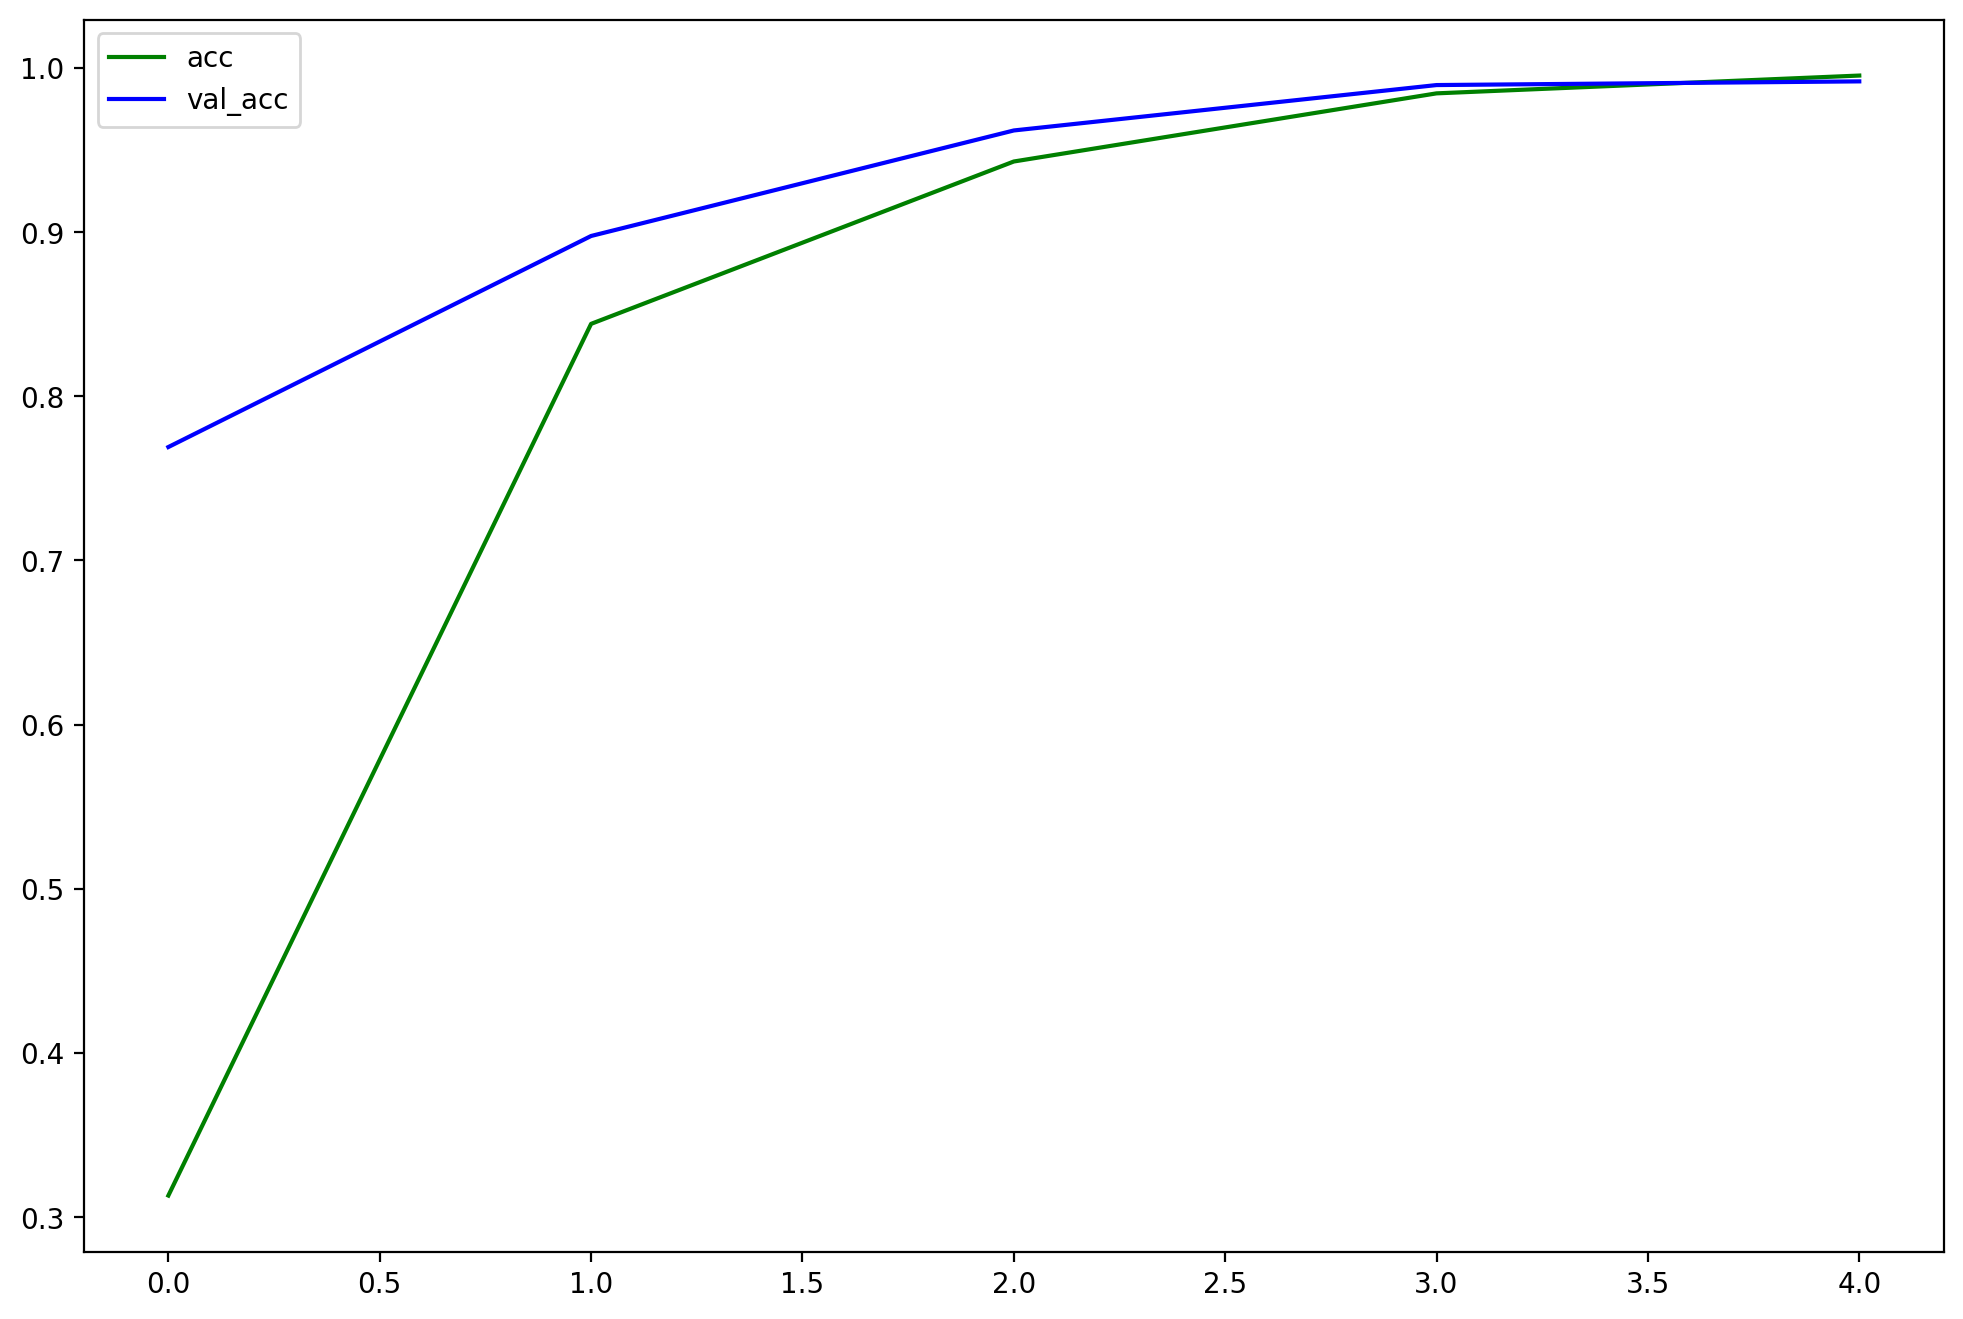

In [46]:
tr.plot(color={'acc': "green", 'val_acc': "blue"})

In [47]:
los= pd.DataFrame({'train_loss':history.history['loss'], 'val_loss': history.history['val_loss'] })


<AxesSubplot:>

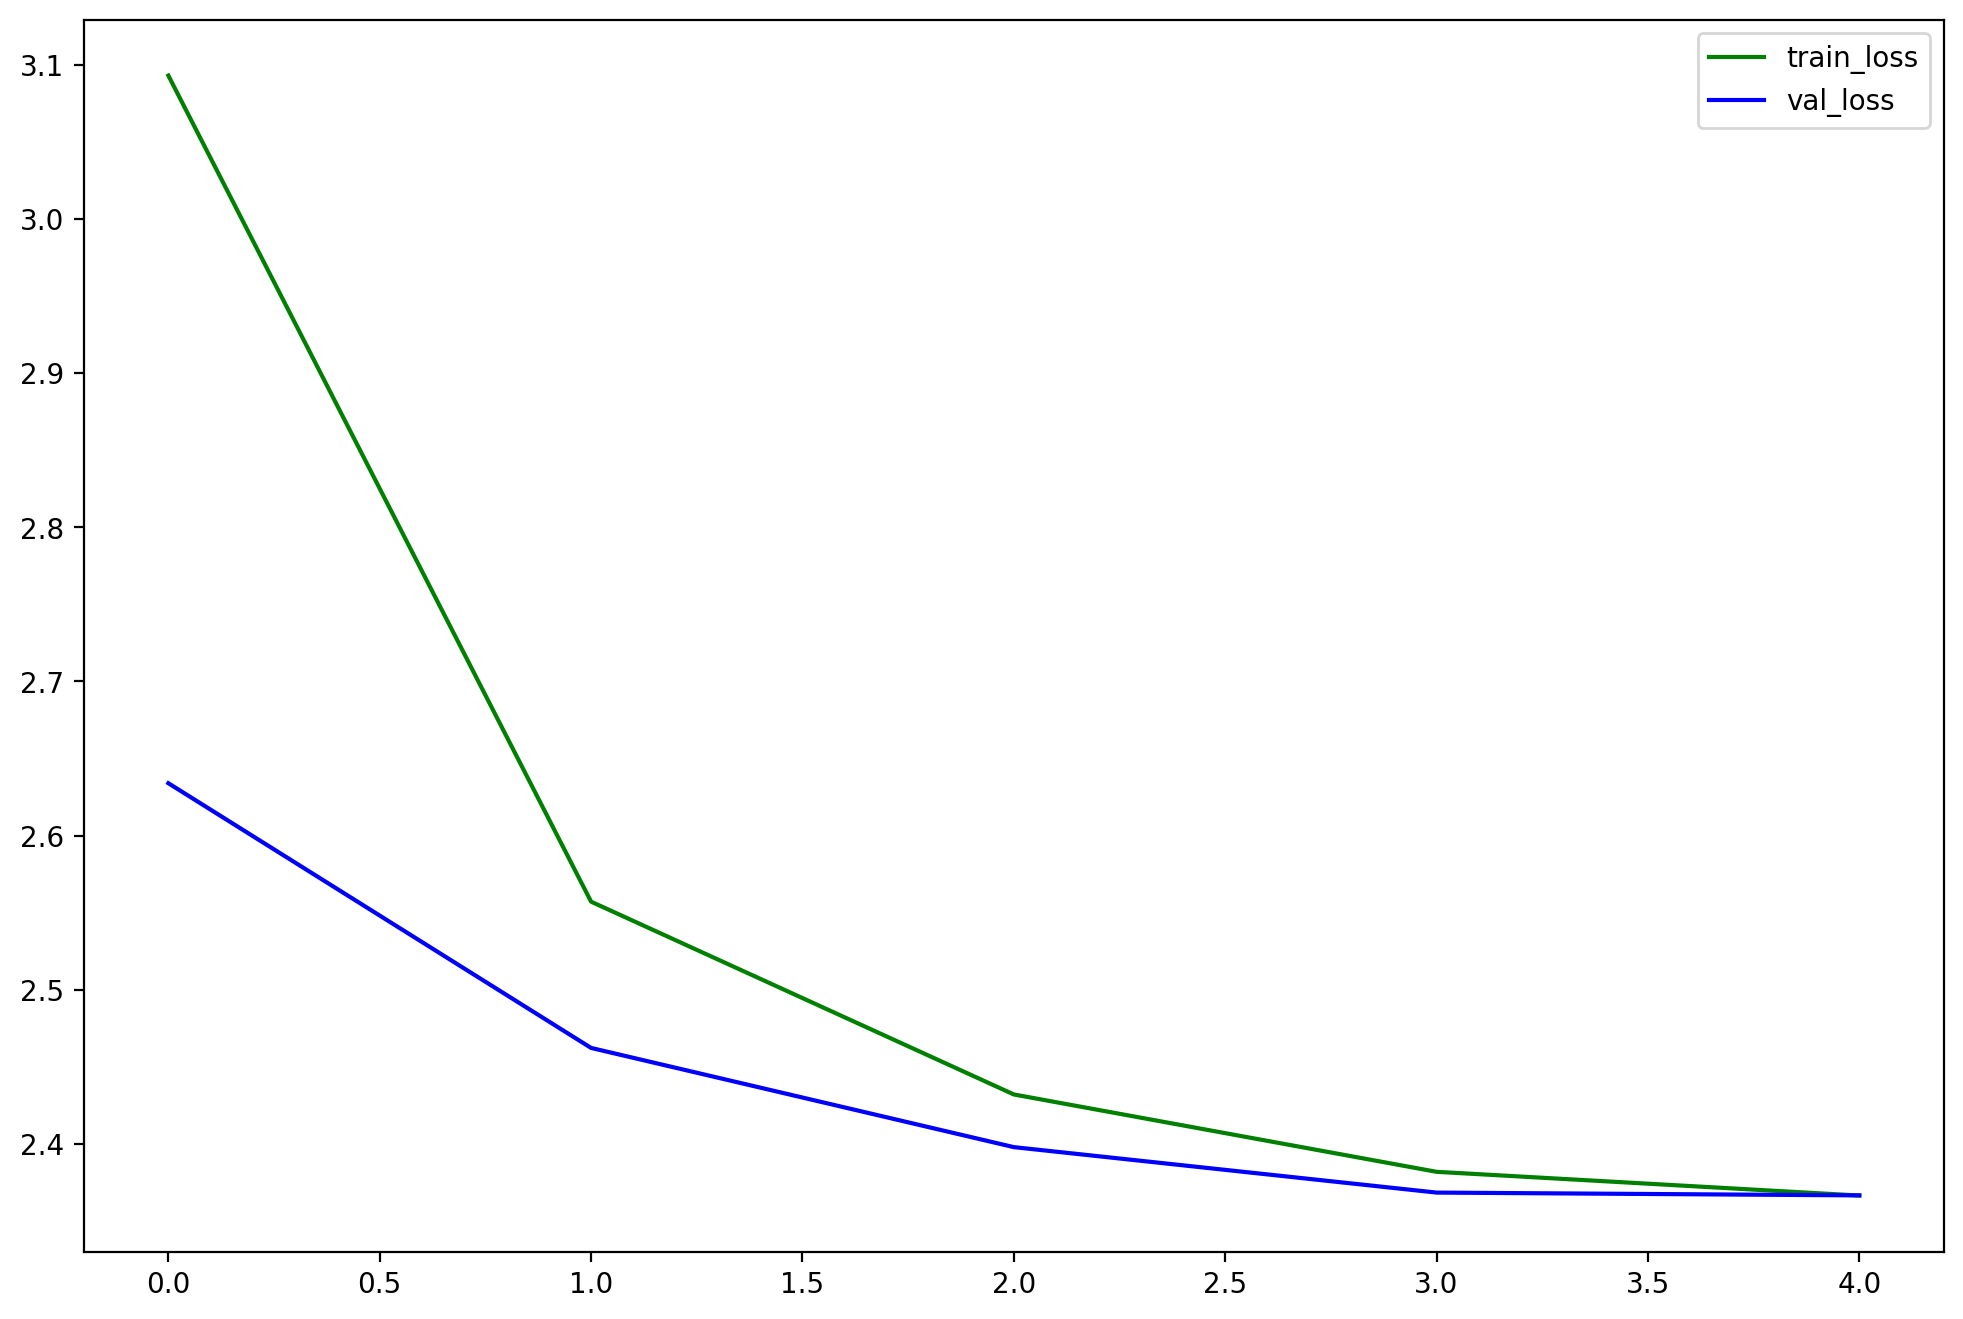

In [48]:
los.plot(color={'train_loss': "green", 'val_loss': "blue"})

In [50]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [49]:
model.save_weights("model_final")

In [51]:
print(classification_report(data.test_y, y_pred, target_names=classes))

                          precision    recall  f1-score   support

            cancel_order       0.94      1.00      0.97        63
            change_order       1.00      1.00      1.00        67
 change_shipping_address       1.00      1.00      1.00        57
  check_cancellation_fee       1.00      1.00      1.00        63
           check_invoice       1.00      1.00      1.00        66
   check_payment_methods       1.00      0.97      0.98        66
     check_refund_policy       1.00      1.00      1.00        54
               complaint       1.00      1.00      1.00        62
contact_customer_service       1.00      1.00      1.00        53
     contact_human_agent       1.00      1.00      1.00        67
          create_account       1.00      0.96      0.98        53
          delete_account       0.98      0.98      0.98        60
        delivery_options       0.96      1.00      0.98        55
         delivery_period       1.00      1.00      1.00        50
         

TypeError: 'numpy.ndarray' object is not callable

In [64]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

TypeError: 'numpy.ndarray' object is not callable

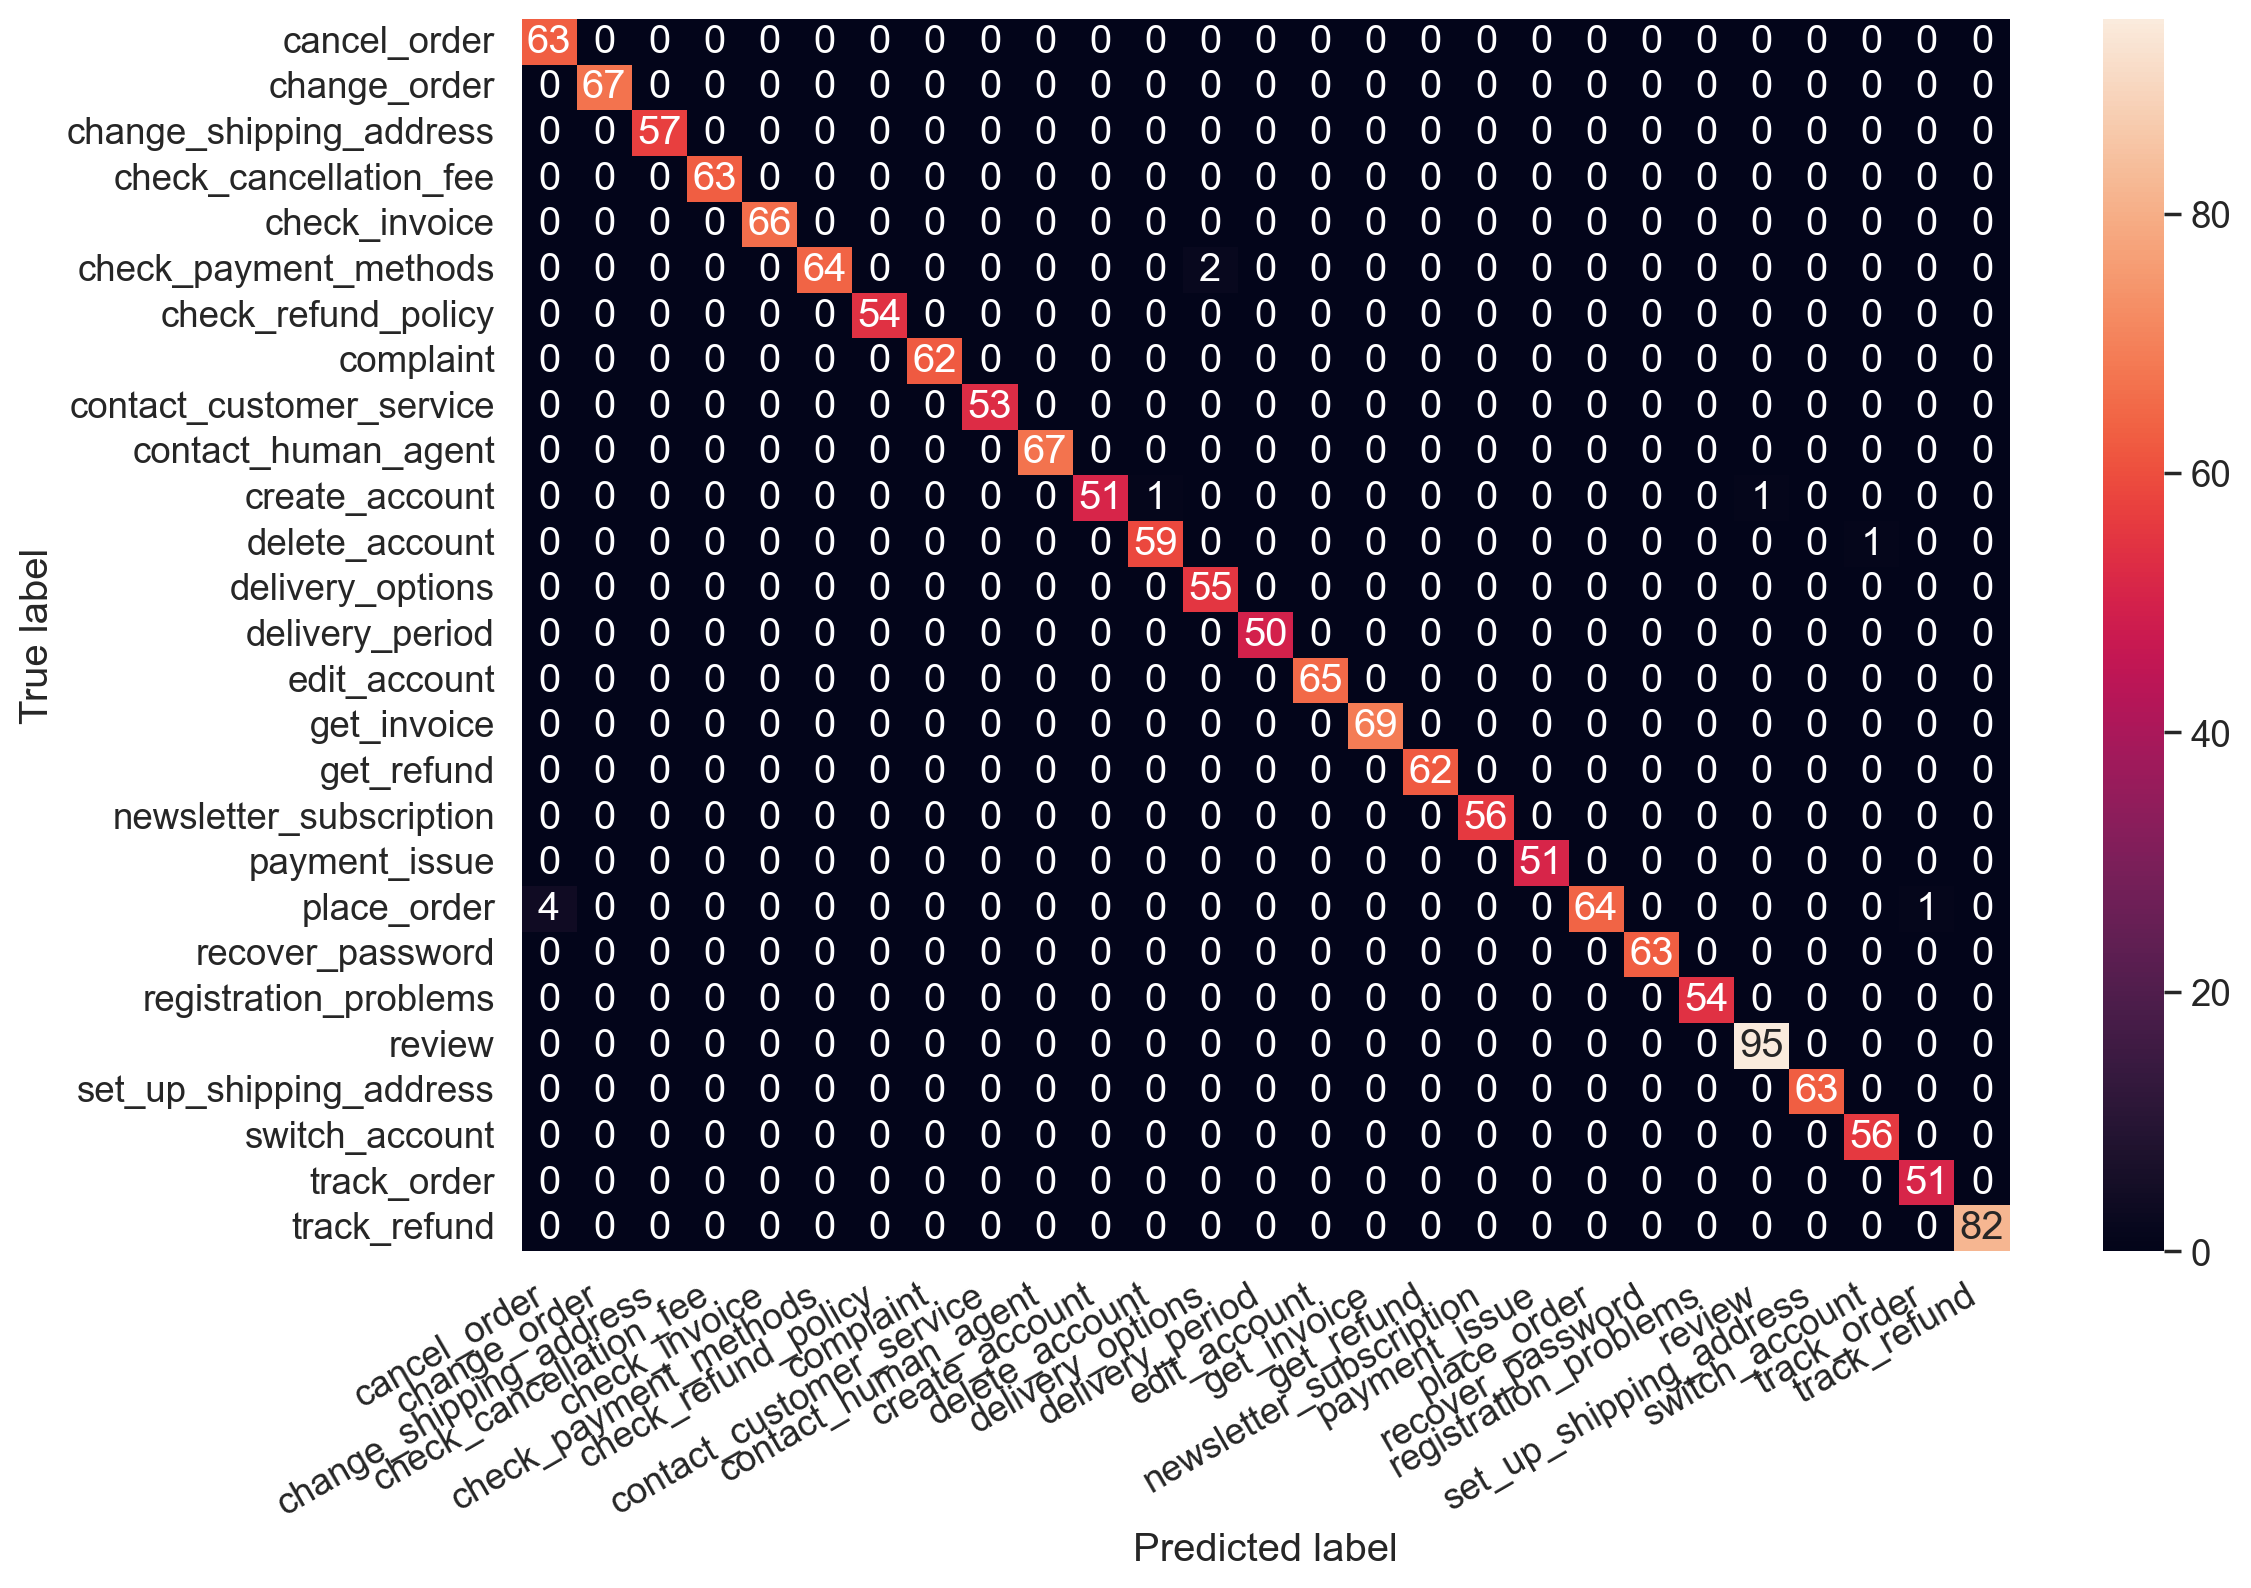

In [63]:
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [42]:
model.save_weights("model_feedback")

NameError: name 'model' is not defined

In [ ]:
sentences = [
  "i want to change",
   "I want to get my money back"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))


predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])
  print()

NameError: name 'retrive_response' is not defined

In [1]:
import json
with open('20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv/Response.json', 'r') as json_data:
    intents = json.load(json_data)

In [2]:
def retrive_response(m):
 for intent in intents['intents']:
    if(m == intent['tag']):
        return intent['responses']
        

In [3]:
retrive_response("get_refund")

['We apologize for the inconvenience caused. We would appreciate it if you could kindly provide us with the reason for your refund request so we can address the issue and improve our services']

In [46]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
sentence = Sentence('good product')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

Sentence above is:  ['Sentence[2]: "good product"'/'POSITIVE' (0.9832)]


In [48]:
loaded_model_from_weights = create_model(data.max_seq_len, bert_ckpt_file)
loaded_model_from_weights.load_weights("model_final")

bert shape (None, 37, 768)
Done loading 196 BERT weights from: C:/Users/PC/Desktop/PFE/uncased_L-12_H-768_A-12\bert_model.ckpt into <bert.model.BertModelLayer object at 0x0000019445FCAB08> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [49]:
sentences = [
  "i want to get my money back",
  
    "i want to buy a product"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = loaded_model_from_weights.predict(pred_token_ids).argmax(axis=-1)


for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])
  print()

text: i want to get my money back 
intent: get_refund

text: i want to buy a product 
intent: place_order



In [50]:
from googletrans import Translator 
translat=Translator()

def ar_to_en(input):
  global translat
  out=translat.translate(input, dest='en')
  return out.text

def en_to_ar(input):
  global translat
  out=translat.translate(input, dest='ar')
  return out.text

def fr_to_en(input):
  global translat
  out=translat.translate(input, dest='en')
  return out.text

def en_to_fr(input):
  global translat
  ouo=translat.translate(input, dest='fr')
  return ouo.text

In [51]:
def get_res(sentence):
 
 s = ""
 for i in range(len(sentence)):
  s=s+sentence[i]

 #print(s)
 sentences=[]
 sentences.append(s)
    
 pred_tokens = map(tokenizer.tokenize, sentences)
 pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
 pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))
 

 pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
 pred_token_ids = np.array(list(pred_token_ids))
  

 predictions = loaded_model_from_weights.predict(pred_token_ids).argmax(axis=-1)


 for text, label in zip(sentences, predictions):
  #print("text:", text, "\nintent:", classes[label])
  #print()
    return classes[label]

In [52]:
get_res("i want to get refund")

'get_refund'

In [53]:
text_input="iam very happy"

In [54]:
from langdetect import detect
def language_translate(lang,text_input):
  text_tras=""  
  if(lang=='ar'):
    text_tras=ar_to_en(text_input)
    
  if(lang=='fr'):
    text_tras=fr_to_en(text_input)
        
  if(lang=='en'): 
    text_tras=text_input
        
  return text_tras     

In [55]:
lang=detect(text_input)
language_translate(lang,text_input)

'iam very happy'

In [56]:
print(text_tras)
text_out=get_res(text_tras)


NameError: name 'text_tras' is not defined

In [ ]:
print(text_out)

In [57]:
def get_sentimen(inp):
  sentence = Sentence(inp)
  classifier.predict(sentence)
  # print sentence with predicted labels
  #print('Sentence above is: ', sentence.labels)
  return(sentence.labels[0].value)
    

In [58]:
get_sentimen('i love this product')

'POSITIVE'

In [ ]:
generate_answer(text_input)

In [2]:
k=[]
k.append("hh")
k.append("hh1")


In [6]:
if(k[-2]=='hh'):
    print("kk")

kk


In [59]:
lis=[]

In [ ]:
from flask import Flask,render_template,request,jsonify
from flask_cors import CORS

app=Flask(__name__)
CORS(app)

@app.route("/predict",methods=["POST"])
def predict():
    text=request.get_json().get("message")
    #chek if text is valid
    
    lang=detect(text)
    #text=language_translate(lang,text)
    if(lang=='ar'):
      text=ar_to_en(text)
    
    if(lang=='fr'):
      text=fr_to_en(text)
        
    if(lang=='en'): 
       text=text
    

    response = get_res(text)
    
        
    lis.append(response)
    if(response=='review'):
        sent=get_sentimen(text)
        if(sent=='NEGATIVE'):
            if(lis[-2]=='get_refund'):
                response='NEGATIVE_refund'
            if(lis[-2]=='complaint'):
                response='NEGATIVE_complaint'
            if(lis[-2]=='cancel_order'):
                response='NEGATIVE_cancel'
            if(lis[-2]!='cancel_order' and lis[-2]!='complaint' and lis[-2]!='get_refund'):
                response='NEGATIVE'    
             
        if(sent=='POSITIVE'):
               response=sent
        
    response =retrive_response(response)
    
    if(lang=='ar'):
        response = ' '.join(response)
        response=en_to_ar(response)
        
    if(lang=='fr'):
        response = ' '.join(response)
        response=en_to_fr(response)
        
    message={"answer": response}
    return jsonify(message)

try: 
    if  __name__ == '__main__':
        app.run(debug=True,port=8000)
except:
    print("Exception occured!")
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat
 * Running on http://localhost:9000
Press CTRL+C to quit


Exception occured!


127.0.0.1 - - [04/Jun/2023 03:22:00] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [04/Jun/2023 03:23:08] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2023 03:23:08] "POST /predict HTTP/1.1" 500 -
Error on request:
Traceback (most recent call last):
  File "C:\Users\PC\AppData\Local\Temp\ipykernel_25312\3907128357.py", line 58, in <module>
    app.run(debug=True,port=8000)
  File "C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\flask\app.py", line 1191, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\werkzeug\serving.py", line 1064, in run_simple
    reloader_type=reloader_type,
  File "C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\werkzeug\_reloader.py", line 444, in run_with_reloader
    sys.exit(reloader.restart_with_reloader())
SystemExit: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\envs\Mohamed\lib\s

In [ ]:

my_string = ' '.join(k)
print(my_string)

In [60]:
tt=en_to_fr(my_string)
print(tt)

Pour ouvrir un compte, cliquez sur le bouton "S'inscrire" ou "S'inscrire" sur la page d'accueil du site Web ou de l'application du service que vous souhaitez utiliser. Cliquez dessus et suivez les instructions pour créer votre compte. Si vous avez besoin d'aide, faites-le moi savoir


In [5]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Kaludi/Customer-Support-Assistant")

model = AutoModelForSeq2SeqLM.from_pretrained("Kaludi/Customer-Support-Assistant")

inputs = tokenizer("Hello world!", return_tensors="tf")
outputs = model(**inputs)

OSError: Kaludi/Customer-Support-Assistant does not appear to have a file named pytorch_model.bin but there is a file for TensorFlow weights. Use `from_tf=True` to load this model from those weights.

In [ ]:
print(data)

In [30]:
predictions=loaded_model_from_weights.predict(data.test_x)

In [80]:
#%% ROC-AUC Curve

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 27 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(data.test_y[:, i], predictions.argmax(axis=-1)[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: too many indices for array

In [67]:


predictions.argmax(axis=-1)

array([22, 21,  9, ..., 21, 11,  5], dtype=int64)

In [71]:
predictions

array([[3.84881389e-07, 1.24097411e-07, 1.39568527e-07, ...,
        2.25205576e-06, 2.94294722e-07, 9.30741635e-08],
       [2.27620674e-07, 3.38538690e-08, 1.05302995e-07, ...,
        1.00332915e-08, 4.84270650e-08, 2.30685941e-08],
       [6.34500225e-07, 5.75700597e-07, 3.36224900e-07, ...,
        3.34308396e-07, 8.87632382e-07, 1.05381412e-06],
       ...,
       [2.85730181e-07, 4.22713562e-08, 7.49017346e-08, ...,
        5.75489656e-09, 3.61951109e-08, 2.04234372e-08],
       [5.05577198e-08, 9.11455658e-08, 2.03108769e-07, ...,
        4.10031440e-08, 8.80600268e-08, 1.82488279e-07],
       [3.68976259e-07, 1.82494404e-07, 5.59051500e-07, ...,
        2.22161111e-06, 2.29966258e-06, 2.59298827e-06]], dtype=float32)

In [74]:
data.test_y

array([22, 21,  9, ..., 21, 11,  5])

In [75]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [76]:
roc_auc_dict = roc_auc_score_multiclass(data.test_y,predictions.argmax(axis=-1))
roc_auc_dict

{0: 0.9996238716148446,
 1: 0.9998797787929791,
 2: 0.9791666666666667,
 3: 0.9977272727272728,
 4: 0.9583333333333333,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 0.984375,
 11: 0.993421052631579,
 12: 0.9954962217041189,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 0.9996400287976962,
 18: 0.9998843128181398,
 19: 0.9956077270945185,
 20: 0.9901960784313726,
 21: 0.999857020303117,
 22: 0.9734042553191489,
 23: 0.9993934983017952,
 24: 0.9923076923076923,
 25: 1.0,
 26: 1.0}

In [63]:
data.test_y

0

In [38]:
auc = roc_auc_score(data.test_y,predictions)
print('AUC =', f'{auc:0.4f}')

ValueError: multi_class must be in ('ovo', 'ovr')

In [67]:
class ExportModel(tf.Module):
  def __init__(self, input_processor, classifier):
    self.input_processor = input_processor
    self.classifier = classifier

  @tf.function(input_signature=[{
      'sentence1': tf.TensorSpec(shape=[None], dtype=tf.string),
      'sentence2': tf.TensorSpec(shape=[None], dtype=tf.string)}])
  def __call__(self, inputs):
    packed = self.input_processor(inputs)
    logits =  self.classifier(packed, training=False)
    result_cls_ids = tf.argmax(logits)
    return {
        'logits': logits,
        'class_id': result_cls_ids,
        'class': tf.gather(
            tf.constant(info.features['label'].names),
            result_cls_ids)
    }

In [68]:
export_model = ExportModel(data, model)

In [ ]:
from tensorflow import keras
model.save('model_Ber.h5')

In [ ]:

from tensorflow import keras
import os
file = "model_Ber.h5"
model=keras.models.load_model(file , custom_objects={'f1_m': f1_m,'precision_m':precision_m,'recall_m':recall_m })

In [ ]:
from transformers import BertConfig, BertModel
model = BertModel.from_pretrained("model_Bert.hdf5")

In [ ]:
tf.saved_model.save(model, 'modee')


In [ ]:
model1 = tf.saved_model.load('modee')

In [ ]:
df2 = pd.read_csv('Bitext_Sample_Customer_Service_Training_Dataset.csv')
df2.head()

In [ ]:
test2 = { 'text': df2['utterance'], 'intent': df2['intent']}
df2 = pd.DataFrame(test2)
df2

In [ ]:
temp_df2=df2.intent.value_counts()
temp_df2

In [ ]:
# Missing values
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.style.background_gradient(cmap='seismic')

In [ ]:
import re
import matplotlib.image as image
import matplotlib.colors
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify as sq

stopwords = set(STOPWORDS)
newStopWords = ['?', "!", "why", 'what', 'how']
stopwords.update(newStopWords)
wordcloud = WordCloud(
    stopwords=stopwords,
    colormap='Set2',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df2['text'].astype(str)))
print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Text",fontsize=25)
plt.axis('off')

In [ ]:
from nltk.metrics.scores import accuracy
from tensorflow import keras
import os
file = "/content/drive/My Drive/Colab_Models/model_Glove_CNN_2.hdf5"
model=keras.models.load_model(file , custom_objects={'f1_m': f1_m,'precision_m':precision_m,'recall_m':recall_m,'accuracy':accuracy })